### Face recognition

In [173]:
'''
!pip install keras_vggface
!pip install mtcnn
'''

'\n!pip install keras_vggface\n!pip install mtcnn\n'

In [1]:
import keras
model = keras.models.load_model('facemaskcnn.h5')

In [13]:

def highlight_faces(model,image_path):
    from mtcnn.mtcnn import MTCNN
    import cv2
    import matplotlib.pyplot as plt
    from matplotlib.patches import Rectangle
    from PIL import Image
    import numpy as np

    # Detect faces in an image
    def detect_faces(image_path):
        im = np.asarray(Image.open(image_path))
        im=np.array(im)[...,:3]
        detector = MTCNN()
        faces = detector.detect_faces(im)
        return faces


    # Get face mask predictions for detected faces
    def get_predictions(faces):
        facepredictions,facelist=[],[]
        for face in faces:
            x, y, width, height = face['box']
            im = Image.open(image_path)
            im = im.crop((x-10,y-10,x+width+20,y+height+20))
            imresized = im.resize((32,32))
            imarray=np.array(imresized)[...,:3]
            facelist.append(imarray)
            facepredictions.append(dict(x=x,y=y,width=width,height=height))
        facearray=np.stack([np.array(im)[...,:3]  for im in facelist], axis=0)

        predictions = model.predict(facearray/255)
        predictions=np.argmax(predictions,axis=1)
        for i,face in enumerate(facepredictions):
            facepredictions[i]['prediction'] = predictions[i]
                    
        return facepredictions
    
    #Mark faces in the graph output
    def mark_faces(**fp):
        #Color code for classes
        colors={0:'orange',1:'green',2:'red'}
        #Mark face borders
        face_border = Rectangle((fp['x']-5, fp['y']-5), fp['width']+10, fp['height']+10,
                          fill=False, color=colors[fp['prediction']])
        ax.add_patch(face_border)
    '''End embedded functions'''
    #Main function code
    faces=detect_faces(image_path)    
    # display base image
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()
    # Get predictions
    predictions=get_predictions(faces)
    
    # Mark faces by prediction
    for pred in predictions:
        mark_faces(**pred)
    plt.show()

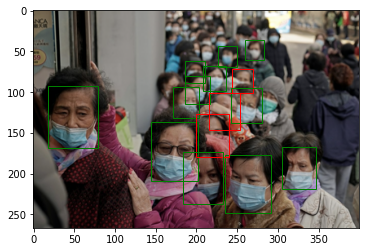

In [14]:
highlight_faces(model,'./images/maksssksksss11.png')